## Part 1 - Exploratory data analysis

In [143]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
# Open and read the JSON file
with open('data/logins.json', 'r') as file:
    data = json.load(file)

# Print the data
#print(data)

In [145]:
#Check type of data
type(data)

dict

In [146]:
#Convert to df
df_data = pd.DataFrame(data)

In [147]:
df_data.shape

(93142, 1)

In [148]:
#Determine when to start/stop the intervals
#Group the data into each interval
#Count the number of values in each interval

In [149]:
#Convert to pandas datetime
df_data.login_time = pd.to_datetime(df_data.login_time)

In [150]:
#Add a column of all 1's
df_data['logins'] = 1

In [151]:
#Check
df_data.head()

,login_time,logins
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [152]:
df_grouped = df_data.groupby(pd.Grouper(key='login_time', freq='15min')).count()

In [153]:
df_grouped.head()

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [154]:
df_grouped.shape

(9788, 1)

Text(0, 0.5, 'Number of logins')

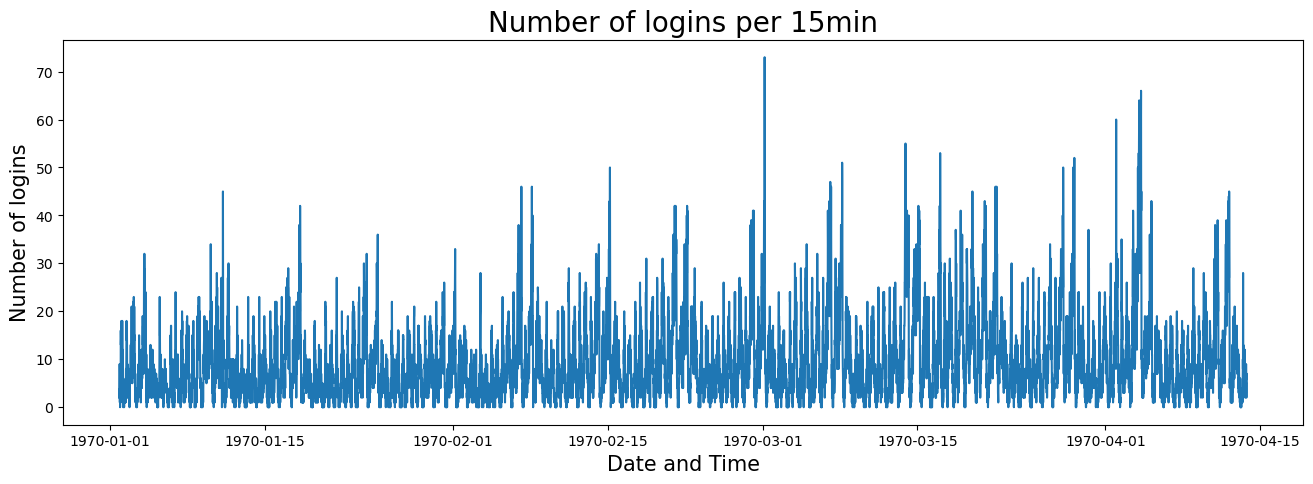

In [155]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(df_grouped.index, df_grouped['logins'])
plt.title('Number of logins per 15min', fontsize=20)
plt.xlabel('Date and Time', fontsize=15)
plt.ylabel('Number of logins', fontsize=15)

## Are there any daily trends?

In [156]:
df_temp = df_grouped.reset_index()

df_temp['times'] = df_temp['login_time'].dt.time

unq = df_temp.times.unique()
unq

array([datetime.time(20, 0), datetime.time(20, 15), datetime.time(20, 30),
       datetime.time(20, 45), datetime.time(21, 0), datetime.time(21, 15),
       datetime.time(21, 30), datetime.time(21, 45), datetime.time(22, 0),
       datetime.time(22, 15), datetime.time(22, 30),
       datetime.time(22, 45), datetime.time(23, 0), datetime.time(23, 15),
       datetime.time(23, 30), datetime.time(23, 45), datetime.time(0, 0),
       datetime.time(0, 15), datetime.time(0, 30), datetime.time(0, 45),
       datetime.time(1, 0), datetime.time(1, 15), datetime.time(1, 30),
       datetime.time(1, 45), datetime.time(2, 0), datetime.time(2, 15),
       datetime.time(2, 30), datetime.time(2, 45), datetime.time(3, 0),
       datetime.time(3, 15), datetime.time(3, 30), datetime.time(3, 45),
       datetime.time(4, 0), datetime.time(4, 15), datetime.time(4, 30),
       datetime.time(4, 45), datetime.time(5, 0), datetime.time(5, 15),
       datetime.time(5, 30), datetime.time(5, 45), datetime.time(6,

In [157]:
df_temp.head()

,login_time,logins,times
0,1970-01-01 20:00:00,2,20:00:00
1,1970-01-01 20:15:00,6,20:15:00
2,1970-01-01 20:30:00,9,20:30:00
3,1970-01-01 20:45:00,7,20:45:00
4,1970-01-01 21:00:00,1,21:00:00


In [158]:
df_grouped_2 = df_temp.groupby('times')['logins'].sum()
df_grouped_2

times
00:00:00    1439
00:15:00    1547
00:30:00    1525
00:45:00    1482
01:00:00    1549
            ... 
22:45:00    1637
23:00:00    1573
23:15:00    1552
23:30:00    1456
23:45:00    1477
Name: logins, Length: 96, dtype: int64

In [159]:
df_grouped_3 = pd.DataFrame(df_grouped_2)
df_grouped_3.reset_index(inplace=True)
df_grouped_3.times = df_grouped_3.times.astype(str)
df_grouped_3.head(10)

,times,logins
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549
5,01:15:00,1598
6,01:30:00,1673
7,01:45:00,1497
8,02:00:00,1509
9,02:15:00,1526


In [160]:
xtick_times = df_grouped_3.times[::4]
xtick_times

0     00:00:00
4     01:00:00
8     02:00:00
12    03:00:00
16    04:00:00
20    05:00:00
24    06:00:00
28    07:00:00
32    08:00:00
36    09:00:00
40    10:00:00
44    11:00:00
48    12:00:00
52    13:00:00
56    14:00:00
60    15:00:00
64    16:00:00
68    17:00:00
72    18:00:00
76    19:00:00
80    20:00:00
84    21:00:00
88    22:00:00
92    23:00:00
Name: times, dtype: object

Text(0, 0.5, 'Count')

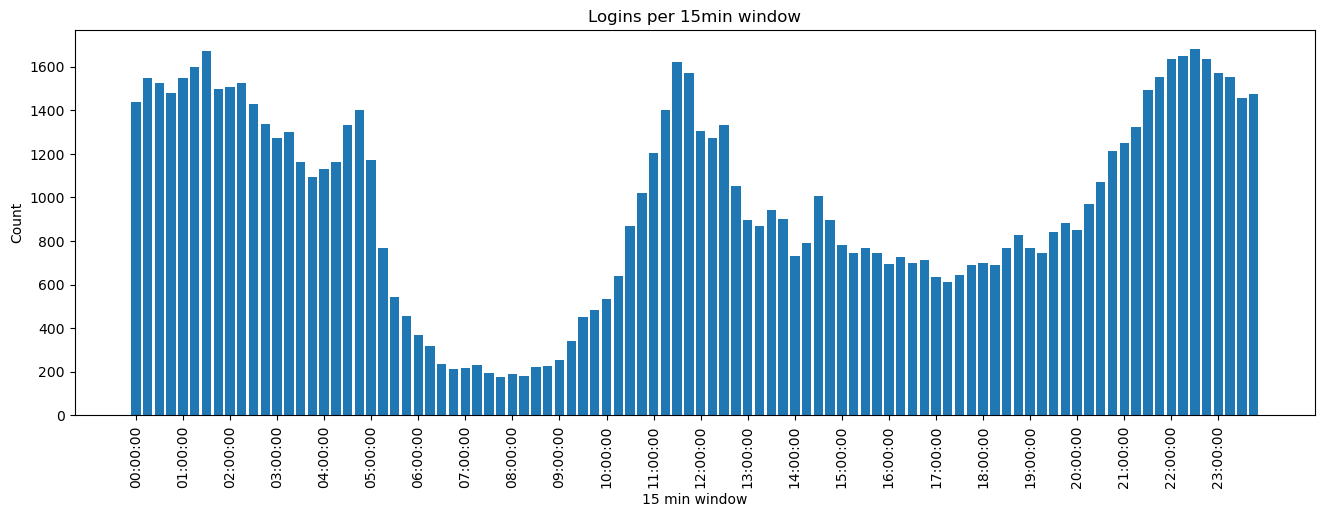

In [161]:
fig,ax = fig, ax = plt.subplots(figsize=(16, 5))
plt.bar(df_grouped_3['times'], df_grouped_3['logins'])
plt.title("Logins per 15min window")
plt.xlabel("15 min window")
plt.xticks(xtick_times, rotation=90)
#plt.xticks(rotation=90)
plt.ylabel("Count")

In [163]:
df_data.set_index('login_time', inplace=True)

In [164]:
df_data.head()

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


## Are there any weekly trends?

In [165]:
df_grouped.head()

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [166]:
df_temp = df_grouped.reset_index()

df_temp['day_of_week'] = df_temp['login_time'].dt.day_name()

df_temp.head()

,login_time,logins,day_of_week
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [167]:
df_grouped_2 = df_temp.groupby('day_of_week')['logins'].sum()
df_grouped_2

day_of_week
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: logins, dtype: int64

In [169]:
df_grouped_3 = pd.DataFrame(df_grouped_2)
df_grouped_3.reset_index(inplace=True)
df_grouped_3.head(10)

,day_of_week,logins
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


In [170]:
# Define the custom order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert the 'day of week' column to a categorical data type with the custom order
df_grouped_3['day_of_week'] = pd.Categorical(df_grouped_3['day_of_week'], categories=day_order, ordered=True)

# Sort the DataFrame by the 'day of week' column
df_grouped_3 = df_grouped_3.sort_values('day_of_week')
df_grouped_3

,day_of_week,logins
3,Sunday,18167
1,Monday,8823
5,Tuesday,9268
6,Wednesday,10339
4,Thursday,11960
0,Friday,15208
2,Saturday,19377


Text(0, 0.5, 'Count')

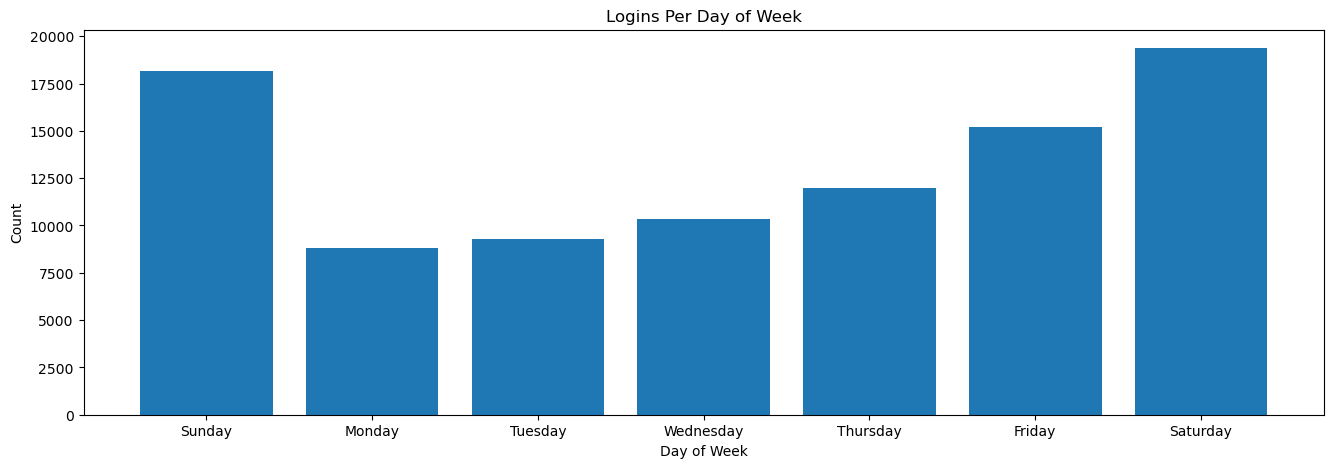

In [171]:
fig,ax = fig, ax = plt.subplots(figsize=(16, 5))
plt.bar(df_grouped_3['day_of_week'], df_grouped_3['logins'])
plt.title("Logins Per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

## Is there any overall trend over time?

In [172]:
df_data.head()

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [173]:
df_grouped.head()

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [174]:
#Calculate number of logins per day
df_temp = df_grouped.reset_index()
df_grouped_4 = df_temp.groupby(pd.Grouper(key='login_time', freq='D')).mean()
df_grouped_4.head()

,logins
login_time,
1970-01-01,7.000000
1970-01-02,7.093750
1970-01-03,8.260417
1970-01-04,8.208333
1970-01-05,4.781250


In [177]:
df_grouped_5 = df_temp.groupby(pd.Grouper(key='login_time', freq='W')).mean()
df_grouped_5.head()

,logins
login_time,
1970-01-04,7.809211
1970-01-11,7.763393
1970-01-18,7.474702
1970-01-25,7.069940
1970-02-01,7.059524


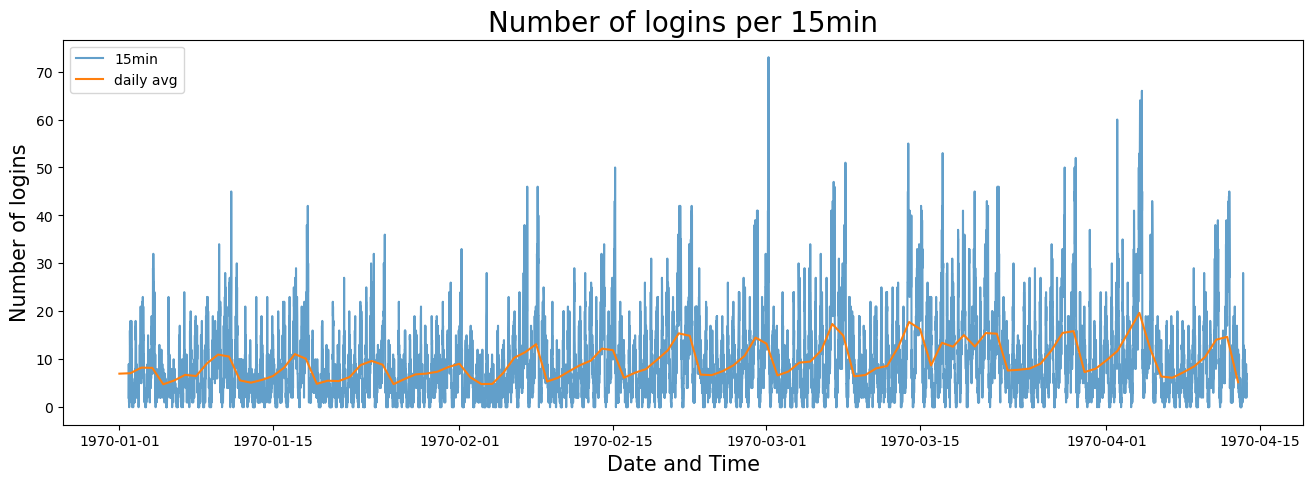

In [180]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(df_grouped.index, df_grouped['logins'], alpha=0.7)
plt.plot(df_grouped_4.index, df_grouped_4['logins'])
plt.title('Number of logins per 15min', fontsize=20)
plt.xlabel('Date and Time', fontsize=15)
plt.ylabel('Number of logins', fontsize=15)
plt.legend(["15min", "daily avg"], loc="upper left")

Text(0, 0.5, 'Number of logins')

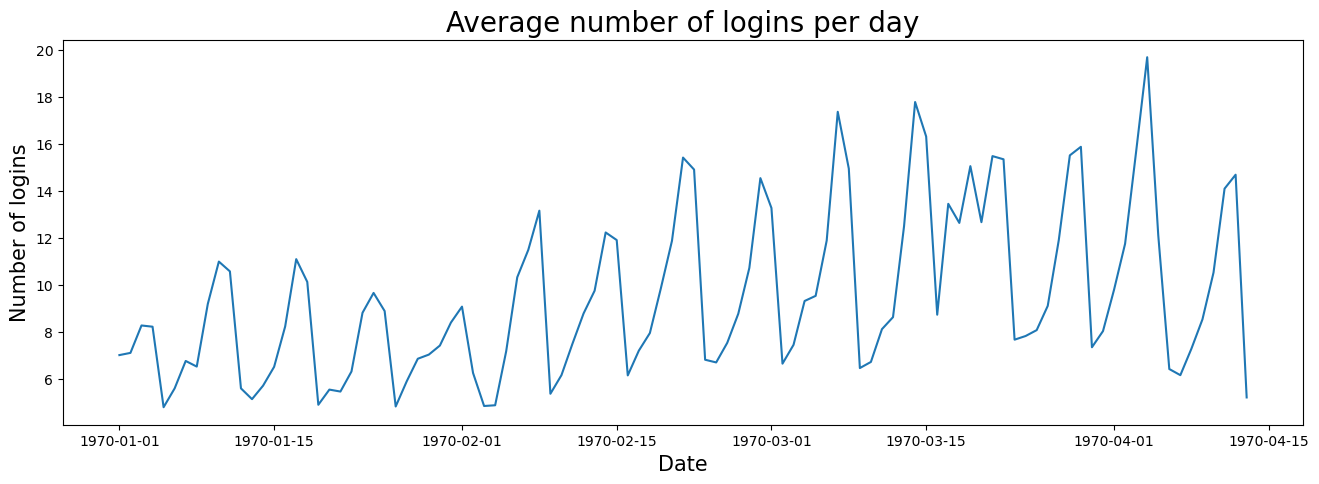

In [176]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(df_grouped_4.index, df_grouped_4['logins'])
plt.title('Average number of logins per day', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of logins', fontsize=15)

#plt.savefig('images/barca_temp_2015.png')

Text(0, 0.5, 'Number of logins')

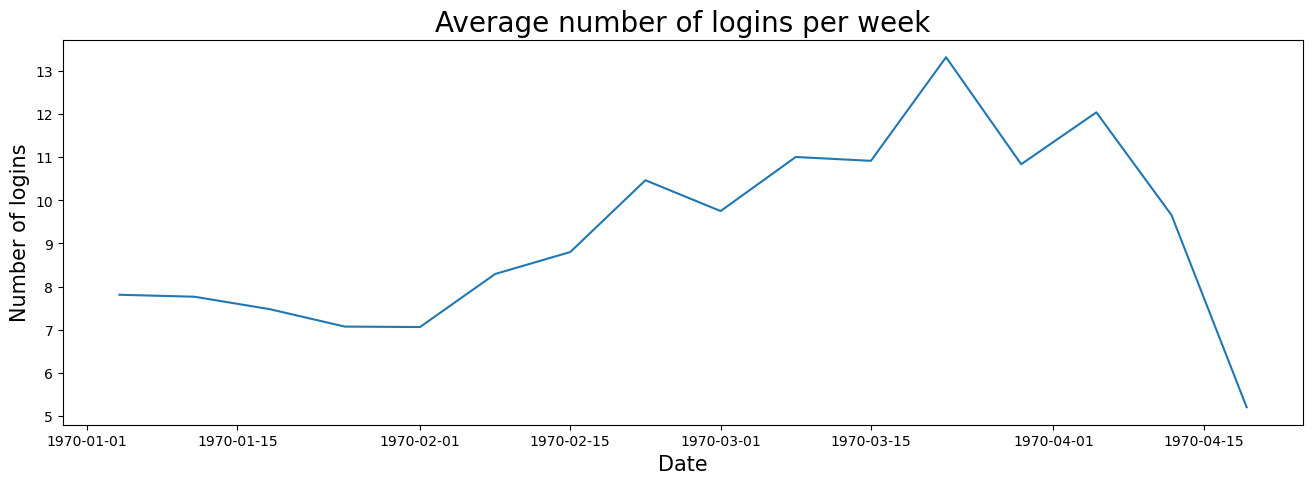

In [178]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(df_grouped_5.index, df_grouped_5['logins'])
plt.title('Average number of logins per week', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of logins', fontsize=15)

## Observations
### Data Quality
The data contains logins starting at January 1, 1970. It is likely that there is an error and that the dates are not actually from the 70s.

### Trends
The first plot of logins at 15 minute intervals is very noisy, although it does appear that there are more logins as time goes on.
The second plot generated was a bar plot grouping the data by 15 minute interval to see if there was any pattern in terms of logins over the course of the day. Plotting the data this way, it is clear that the lowest time for logins is between 5:00am and 11:00am, with the lowest time being around 8:00am. Logins increase during lunchtime, fall somewhat between 1:00pm and 9:00pm and rise again from 9:00pm to about 5:00am. 

The original plot also hinted that there might be patterns to usage over the course of the week. The second bar plot shows logins grouped by day of the week. Usage is at its lowest on Monday and gradually climbs to a peak on Saturday and Sunday.

Finally, the question remains, are logins increasing over time? The last several plots attempt to answer this. First the average number of logins per day are plotted on top of the original 15min interval plot. While it is helpful to see the noise reduced via the overlaid line, the trend is not particularly clear. Viewing the plot of the average number of logins per day by itself starts to make the trend more apparent. Finally, plotting the average number of logins per week, it is clear that logins increase until late March and then start to drop off quickly.